In [24]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
tau = 0.1

In [4]:
kf = KalmanFilter(
    initial_state_mean=[30, 10],
    initial_state_covariance=np.eye(2),
    transition_matrices=[[1, tau],[0, 1]],
    observation_matrices=[[1, 0]],
    transition_covariance=np.zeros((2, 2)),
    observation_covariance=3,
    transition_offsets=[-4.9 * tau **2, -9.8 * tau],
    random_state=5
)

In [5]:
times = np.arange(40)
times = times * tau
times

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9])

In [6]:
actual = -4.9 * times ** 2
actual

array([-0.0000e+00, -4.9000e-02, -1.9600e-01, -4.4100e-01, -7.8400e-01,
       -1.2250e+00, -1.7640e+00, -2.4010e+00, -3.1360e+00, -3.9690e+00,
       -4.9000e+00, -5.9290e+00, -7.0560e+00, -8.2810e+00, -9.6040e+00,
       -1.1025e+01, -1.2544e+01, -1.4161e+01, -1.5876e+01, -1.7689e+01,
       -1.9600e+01, -2.1609e+01, -2.3716e+01, -2.5921e+01, -2.8224e+01,
       -3.0625e+01, -3.3124e+01, -3.5721e+01, -3.8416e+01, -4.1209e+01,
       -4.4100e+01, -4.7089e+01, -5.0176e+01, -5.3361e+01, -5.6644e+01,
       -6.0025e+01, -6.3504e+01, -6.7081e+01, -7.0756e+01, -7.4529e+01])

In [7]:
sim = actual + 3 * np.random.randn(40)

In [8]:
state_means, state_covs = kf.filter(sim)

In [9]:
state_means.shape

(40, 2)

In [10]:
state_covs.shape

(40, 2, 2)

In [11]:
state_covs[0, :, :]

array([[0.75, 0.  ],
       [0.  , 1.  ]])

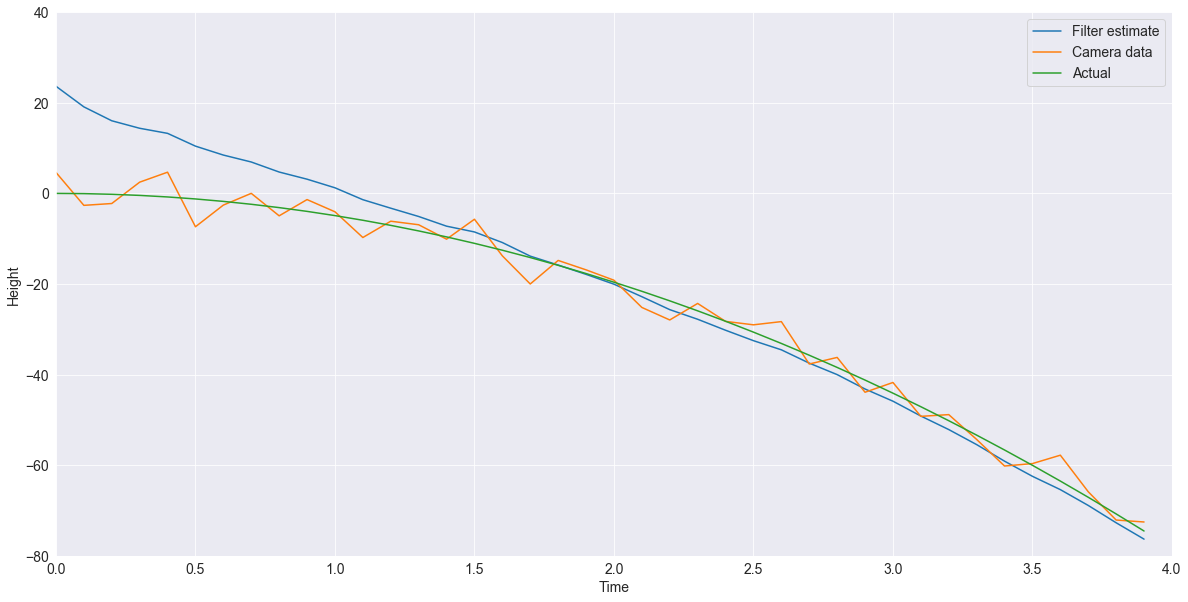

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(times, state_means[:, 0])
ax.plot(times, sim)
ax.plot(times, actual)
ax.set_xlim(0.0, 4.0)
ax.set_ylim(-80, 40)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(['Filter estimate', 'Camera data', 'Actual'], fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Height', fontsize=14)
plt.show()

In [13]:
filtered_state_means = kf.initial_state_mean
filtered_state_covariances = kf.initial_state_covariance

In [14]:
filtered_state_means

[30, 10]

In [15]:
filtered_state_covariances

array([[1., 0.],
       [0., 1.]])

In [16]:
observations = sim[1:]

In [17]:
observations

array([-2.63737729e+00, -2.23400601e+00,  2.47807821e+00,  4.68093269e+00,
       -7.36403512e+00, -2.58099759e+00,  9.01143202e-03, -4.94820584e+00,
       -1.36441982e+00, -4.05749127e+00, -9.73681540e+00, -6.13873856e+00,
       -6.91987682e+00, -1.01053660e+01, -5.70686190e+00, -1.37856999e+01,
       -1.99961059e+01, -1.47979631e+01, -1.68746182e+01, -1.91642747e+01,
       -2.51740894e+01, -2.79372564e+01, -2.42913294e+01, -2.82520711e+01,
       -2.90112145e+01, -2.83014903e+01, -3.76606992e+01, -3.62106942e+01,
       -4.38942172e+01, -4.17408416e+01, -4.92166791e+01, -4.88328712e+01,
       -5.43157955e+01, -6.01796518e+01, -5.96418108e+01, -5.77898806e+01,
       -6.58631109e+01, -7.21073205e+01, -7.25346593e+01])

In [18]:
results = [filtered_state_means[0]]
for observation in observations:
    filtered_state_means, filtered_state_covariances = kf.filter_update(
        filtered_state_means,
        filtered_state_covariances,
        observation=observation
    )
    results.append(filtered_state_means[0])

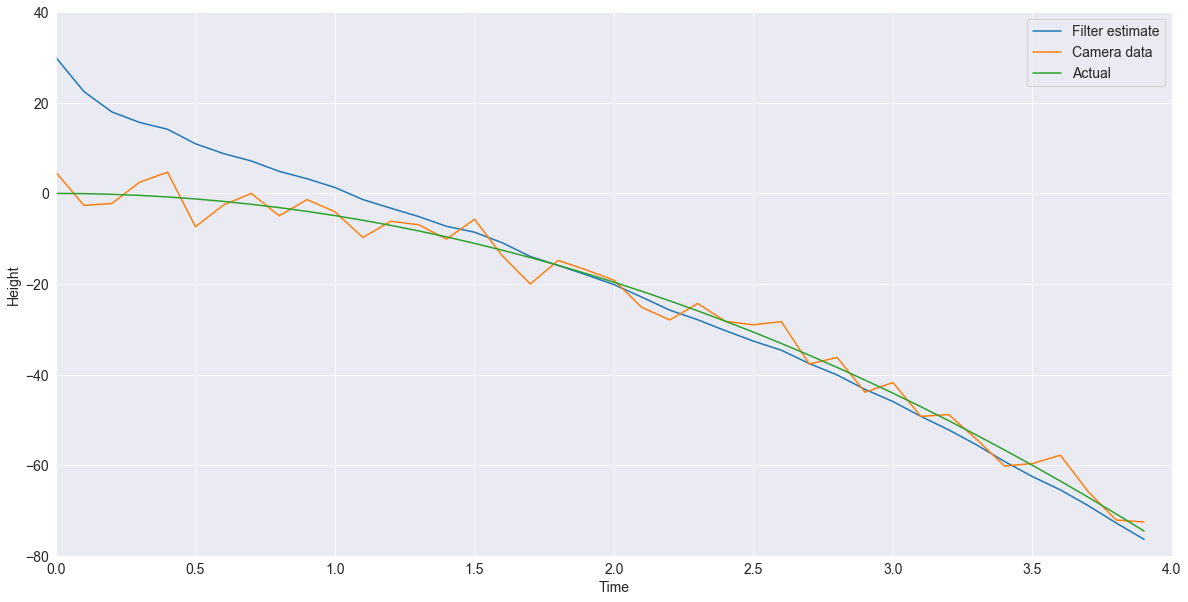

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(times, results)
ax.plot(times, sim)
ax.plot(times, actual)
ax.set_xlim(0.0, 4.0)
ax.set_ylim(-80, 40)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(['Filter estimate', 'Camera data', 'Actual'], fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Height', fontsize=14)
plt.show()

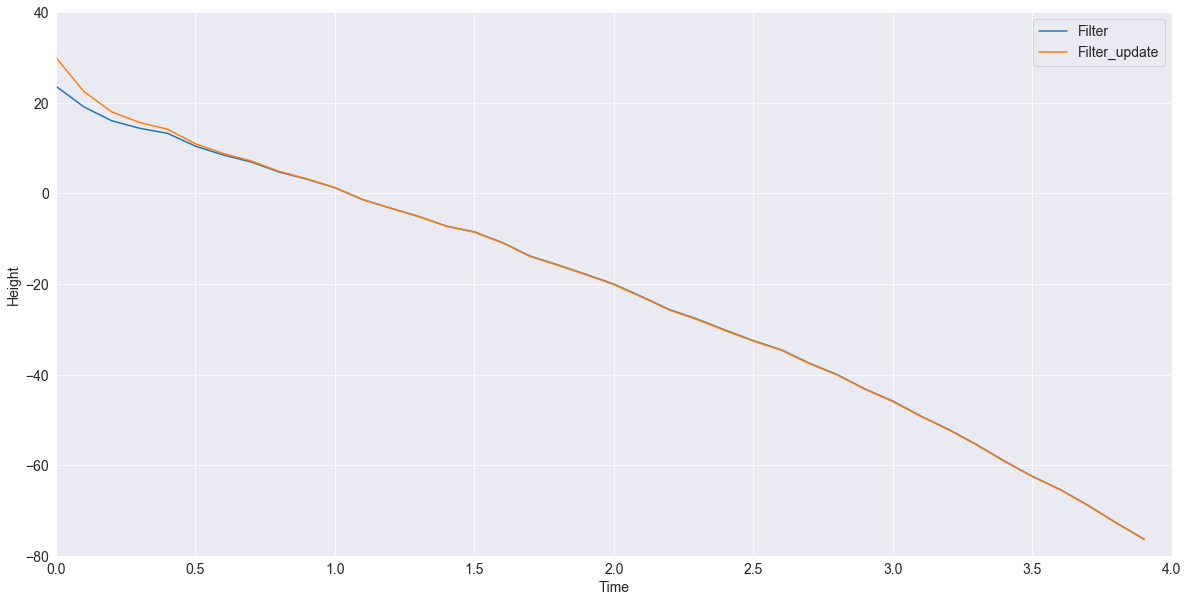

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(times, state_means[:, 0])
ax.plot(times, results)
ax.set_xlim(0.0, 4.0)
ax.set_ylim(-80, 40)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(['Filter', 'Filter_update'], fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Height', fontsize=14)
plt.show()

In [21]:
state_means[:, 0]

array([ 23.65979935,  19.10318918,  16.03346288,  14.37825662,
        13.25617162,  10.43490006,   8.46306   ,   6.9322459 ,
         4.7183788 ,   3.1378002 ,   1.24030024,  -1.38745096,
        -3.2657544 ,  -5.09629603,  -7.23421432,  -8.509799  ,
       -10.84516509, -13.84901925, -15.81297365, -17.87060777,
       -20.03897582, -22.80131521, -25.65964041, -27.78269408,
       -30.20771358, -32.50965685, -34.52973801, -37.46982318,
       -40.0005626 , -43.17883495, -45.87087315, -49.14639579,
       -52.13318001, -55.45352328, -59.1105957 , -62.45428588,
       -65.39369935, -68.884622  , -72.70908517, -76.32223353])

In [22]:
results

[30,
 22.491084523926347,
 17.99665215693873,
 15.662761818444956,
 14.157564876607445,
 10.960331132747733,
 8.800701541505564,
 7.164017349849084,
 4.866852781964704,
 3.2368794649822785,
 1.300482630331167,
 -1.3583570368369358,
 -3.261443759308282,
 -5.113103331437011,
 -7.269353547938141,
 -8.558811184313555,
 -10.908047629383358,
 -13.92711094351879,
 -15.898677709294214,
 -17.9618995103429,
 -20.13432486288435,
 -22.9040434416663,
 -25.768903752545192,
 -27.88868297369174,
 -30.31198515812497,
 -32.60901701198535,
 -34.61912831639041,
 -37.559588564347834,
 -40.08385687032072,
 -43.26293256207483,
 -45.947765004403784,
 -49.22279980639108,
 -52.20374765099733,
 -55.52164540709473,
 -59.17957242970237,
 -62.51837046269323,
 -65.44621095536193,
 -68.9322952160238,
 -72.75533378907203,
 -76.36290841512509]